# CRASH PREDICTION: Predicción de accidentes viales #

En el presente notebook se detallará la construcción de un modelo de Machine Learning encargado de realizar 
predicciones de tipos de accidente viales (No fatal y Fatal). Para ello se implementarán y evaluará la eficacia de los siguientes algoritmos:

 - Logistic Regresion
 - Support Vector Machines (Classifier)
 - Multilayer Perceptron (Classifier)
 - Random Forest (Classifier)
 


## 1 - Librerías ##

Primero, importamos las librerías necesarias para construir y vizualizar nuestro modelo.

- [numpy](www.numpy.org) es el paquete fundamental para la computación científica con Python.
- [matplotlib](http://matplotlib.org) es una librería famosa para trazar gráficos en Python.
- [pandas](https://pandas.pydata.org) es una librería para manipulación y análisis de datos en Python.
- [seaborn](https://seaborn.pydata.org/) es una librería de visualización de datos de Python basada en matplotlib.
- [sklearn](https://scikit-learn.org/stable/) es una librería de Machine Learning libre para el lenguaje de programación Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## 2 - Importar los datos ##

Para el entrenamiento y prueba de nuestros modelos, se utilizarán los siguientes datasets los cuales ya fueron previamente limpiados y procesados.

 - **'subset_atus_anual_2011-17_train.csv'.** Dataset de entrenamiento. Contiene datos de accidentes viales desde 2011 hasta 2017 (repositorio balanceados con misma cantidad de registros para cada clase a predecir). Total de registros: **13,529**, total de columnas: **70**.
 
 
 - **'subset_atus_anual_2011-17_test.csv'.** Dataset de prueba. Contiene datos de accidentes viales desde 2011 hasta 2017. Total de registros: **829,040**, total de columnas: **70**.

In [2]:
mainpath = 'C:/Users/ISAACGONZALEZGUTIERR/Documents/Personal/Proyecto Modular/datasets/'
df_train = pd.read_csv(mainpath + 'subset_atus_anual_2011-17_binario_balanceado_2class_AllFeatures_Mes.csv')
df_test = pd.read_csv(mainpath + 'subset_atus_anual_2011-17_binario_2class_validacion_Mes.csv')

## 3 - Definir las variables  ##

Se define la variable objetivo "*CLASACC*", así como se eliminan las variables que no aportan información relevante al modelo. Posteriormente se asignan los resgistros a sus respectiva variables que utilizará el modelo.

In [3]:
#Variable a predecir
target = 'CLASACC'

#Columnas a eliminar
names = ['CLASACC', 'TRANVIA', 'FERROCARRI',
         'TIPACCID_Colision con vehiculo automotor2',
         'URBANA_Sin accidente en esta zona',
         'SUBURBANA_Sin accidente en esta zona',
         'MICROBUS',
         'OMNIBUS',
         'TIPACCID_Caida de pasajero',
         'TIPACCID_Colision con animal',
         'TIPACCID_Incendio',
         'CAUSAACCI_Falla del vehiculo',
         'CAUSAACCI_Otra',
         'CAPAROD_No Pavimentada',
         'SEXO_Mujer',
         'ALIENTO_No',
         'CINTURON_No',
         'TIPACCID_Colision con ferrocarril']

#Asignamos la variables predictoras y el target a arreglos de numpy para los datos de entrenamiento
X = np.array(df_train.drop(columns = names))
y = np.array(df_train[target], dtype = np.int8)

#Mezclamos los registros de entrenamiento con Shuffle
X_train, y_train = shuffle(X, y, random_state = 0)

#Asignamos la variables predictoras y el target a arreglos de numpy para los datos de entrenamiento
X_val = np.array(df_test.drop(columns = names))
y_val = np.array(df_test[target], dtype = np.int8)

#Mezclamos los registros de prueba con Shuffle
X_test, y_test = shuffle(X_val, y_val, random_state = 0)


## 4 - Construcción y entrenamiento del modelo ##

Para la creación de los algoritmos de Machine Learning, se utilizaron las clases brindadas por la librería Sklearn. Los modelos se ajustaron con sus respectivos hiperparámetros obtenidos mediante la clase GridSearchCV, incluida en la librería de sklearn.

### 4.1 - Random Forest ###

Un bosque aleatorio es un estimador que se ajusta a varios clasificadores de árbol de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra siempre es el mismo que el tamaño de la muestra de entrada original, pudiendo extraerse la muestra con reemplazo o sin reemplazo.

Parámetros a ajustar:

 - **n_estimators:** número de arboles generados por el bosque aleatorio.
 - **criterion:** la función para medir la calidad de la división.
 - **max_depth:** profundidad máxima de los árboles.
 - **min_samples_split:** el número mínimo de muestras requeridas para para dividir un nodo interno.
 - **min_samples_leaf:** el número mínimo de muestras requeridas para ser consideradas una hoja.
 - **max_features:** número máximo de caraterísticas a utilizar en un árbol.

In [4]:
model_RF = RandomForestClassifier(n_estimators=500,
                               n_jobs = 2,
                               criterion = 'entropy',
                               max_depth = 20,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               max_features = 12,
                               random_state=0)

model_RF.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 4.1 - Support Vector Classifier (SVC) ###

Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte.

Parámetros a ajustar:

 - **kernel:** función kernel utilizada en el algoritmo.
 - **C:** parámetro de penalización para el término del error.
 - **gamma:** coeficiente de los kernel 'rbf', 'poly' y 'sigmoid'.

In [5]:
model_SVC = SVC(kernel='rbf',
                  C=12,
                gamma=0.01)

model_SVC.fit(X_train, y_train)

SVC(C=12, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 4.3 - Multilayer Perceptron ###

El perceptrón multicapa es una red neuronal artificial formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón.

Parámetros a ajustar:

 - **activation:** función de activación para las capas ocultas.
 - **max_iter:** número máximo de iteraciones durante la optimización de los pesos.
 - **batch_size:** tamaño de mini lotes para optimizadores estocásticos.
 - **alpha:** parámetro de penalización L2 (término de regularización).
 - **learning_rate:** tasa de aprendizaje programada para la actualización de los pesos.
 - **learning_rate_init:** tasa de aprendizaje inicial.
 - **solver:** solver para la optimización de los pesos.


In [6]:
model_MLP = MLPClassifier(activation = 'logistic',
                      max_iter = 1000,
                      batch_size = 100,
                      alpha = 0.0005,
                      learning_rate = 'constant',
                      learning_rate_init = 0.001,
                      solver = 'adam',
                      random_state = 0)


model_MLP.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0005, batch_size=100, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

### 4.4 - Logistic Regression ###

Análisis de regresión utilizado para predecir el resultado de una variable categórica en función de las variables.  independientes o predictoras. utiliza como función de enlace la función logística ($\frac{1}{1 + e^{-z}}$).

 - **C:** Inverso de la fuerza de regularización (función de coste).
 - **max_iter:** Número máximo de iteraciones tomadas para que el optimizador converja.
 - **solver:** solver para la optimización de los pesos.

In [7]:
model_LogReg = LogisticRegression(solver='lbfgs',
                               max_iter = 1000,
                               C = 0.02,
                               random_state = 0)

model_LogReg.fit(X_train, y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 5 - Métricas de evaluación ##

### 5.1 - Accuracy classification score.###

Exactitud media de las predicciones con respecto al valor verdadero: $\frac{vp + vn}{vp + fp + vn + fn}$, donde $vp$ es el número de verdaderos positivos y $fp$ el número de falsos positivos.

In [ ]:
# Asignamos el score obtenido durante el entrenamiento
score_Test_RF = model_RF.score(X_test, y_test)
score_Test_SVC = model_SVC.score(X_test, y_test)
score_Test_MLP = model_MLP.score(X_test, y_test)
score_Test_LogReg = model_LogReg.score(X_test, y_test)

# Declaramos el vector con nuestras predicciones para los datos de entrenamiento
ytest_pred_RF = model_RF.predict(X_test)
ytest_pred_SVC = model_SVC.predict(X_test)
ytest_pred_MLP = model_MLP.predict(X_test)
ytest_pred_LogReg = model_LogReg.predict(X_test)

print('Score test Random Forest: {0: .5f}'.format(score_Test_RF))
print('Score test Random Forest: {0: .5f}'.format(score_Test_SVC))
print('Score test Random Forest: {0: .5f}'.format(score_Test_MLP))
print('Score test Random Forest: {0: .5f}'.format(score_Test_LogReg))

In [8]:
# Asignamos el score obtenido durante el entrenamiento
score_Test_RF = model_RF.score(X_test, y_test)

# Declaramos el vector con nuestras predicciones para los datos de entrenamiento
ytest_pred_RF = model_RF.predict(X_test)

print('Score test Random Forest: {0: .5f}'.format(score_Test_RF))

Score test Random Forest:  0.83048


In [32]:
# Asignamos el score obtenido durante el entrenamiento
score_Test_SVC = model_SVC.score(X_test[:100000,:], y_test[0:100000])

# Declaramos el vector con nuestras predicciones para los datos de entrenamiento
ytest_pred_SVC = model_SVC.predict(X_test[:100000,:])

print('Score test SVC: {0: .5f}'.format(score_Test_SVC))

Score test SVC:  0.77705


In [33]:
# Asignamos el score obtenido durante el entrenamiento
score_Test_MLP = model_MLP.score(X_test[:100000,:], y_test[0:100000])

# Declaramos el vector con nuestras predicciones para los datos de entrenamiento
ytest_pred_MLP = model_MLP.predict(X_test[:100000,:])

print('Score test MLP: {0: .5f}'.format(score_Test_MLP))

Score test MLP:  0.79948


In [34]:
# Asignamos el score obtenido durante el entrenamiento
score_Test_LogReg = model_LogReg.score(X_test, y_test)

# Declaramos el vector con nuestras predicciones para los datos de entrenamiento
ytest_pred_LogReg = model_LogReg.predict(X_test)

print('Score test Logistic Regression: {0: .5f}'.format(score_Test_LogReg))

Score test Logistic Regression:  0.78472


### 5.2 - Reporte de clasificación ###

Reporte compuesto por las principales métricas de clasificación.

 - **Precisión:** es la relación de $\frac{vp}{vp + fp}$, donde $vp$ es el número de verdaderos positivos y $fp$ el número de falsos positivos. La precisión es intuitivamente la capacidad del clasificador de no etiquetar como positiva una muestra que es negativa. El mejor valor es 1 y el peor es 0.
 

 - **Sensibilidad:** es la relación $\frac{vp}{vp + fn}$, donde $vp$ es el número de verdaderos positivos y $fn$ el número de falsos negativos. La sensibilidad es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es 1 y el peor es 0.
 
 
 - **F1_score:** El puntaje F1 se puede interpretar como un promedio ponderado de la precisión y la sensibilidad, donde un puntaje F1 alcanza su mejor valor en 1 y el peor puntaje en 0. La contribución relativa de precisión y recuerdo al puntaje F1 es igual. La fórmula para el puntaje F1 es:
 
$$F1 = \frac{2 * (precisión * sensibilidad)}{(precisión + sensibilidad)}$$
 
 


In [17]:
print('Clasification report Random Forest:\n')
print(classification_report(y_test, ytest_pred_RF))


Clasification report Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.83      0.91    822276
           1       0.04      0.91      0.08      6765

    accuracy                           0.83    829041
   macro avg       0.52      0.87      0.49    829041
weighted avg       0.99      0.83      0.90    829041



In [20]:
print('Clasification report SVC:\n')
print(classification_report(y_test[:100000], ytest_pred_SVC))

Clasification report SVC:

              precision    recall  f1-score   support

           0       1.00      0.78      0.87     99163
           1       0.03      0.85      0.06       837

    accuracy                           0.78    100000
   macro avg       0.51      0.81      0.47    100000
weighted avg       0.99      0.78      0.87    100000



In [22]:
print('Clasification report MLP:')
print(classification_report(y_test[:100000], ytest_pred_MLP))

Clasification report MLP:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     99163
           1       0.03      0.85      0.07       837

    accuracy                           0.80    100000
   macro avg       0.52      0.83      0.48    100000
weighted avg       0.99      0.80      0.88    100000



In [36]:
print('Clasification report Logistic Regression:')
print(classification_report(y_test, ytest_pred_LogReg))

Clasification report Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    822276
           1       0.03      0.77      0.05      6765

    accuracy                           0.78    829041
   macro avg       0.51      0.78      0.47    829041
weighted avg       0.99      0.78      0.87    829041



### 5.3 - Matriz de confusión ###

Mtriz en la cual cada columna representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real


<img src="img/confusion_matix_example.png" style="width:400px;height:400px;">


### 5.3.1 - Matriz de confusión Random Forest ###


Matriz de confusión Random Forest : 

[[682366 139910]
 [   633   6132]]



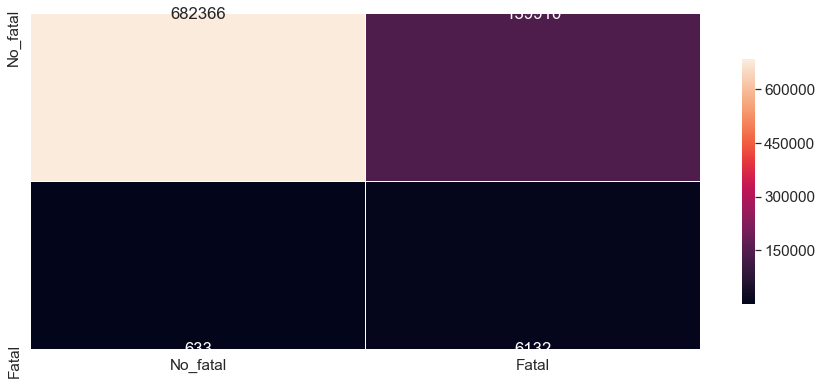

In [25]:

print('\nMatriz de confusión Random Forest : \n')
cm = confusion_matrix(y_test, ytest_pred_RF)
target_names = ['No_fatal', 'Fatal']

print(cm)
print()


plt.figure(figsize=(15, 9))
b, t = plt.ylim()
b += 20
t -= 20
plt.ylim(b, t)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, square = True,
            linewidths=0.2,
            xticklabels = target_names,
            yticklabels = target_names,
            robust = False,
            cbar_kws = {'shrink': 0.5},
            fmt="d")

### 5.3.2 - Matriz de confusión SVC ###


Matriz de confusión SVC : 

[[76994 22169]
 [  126   711]]



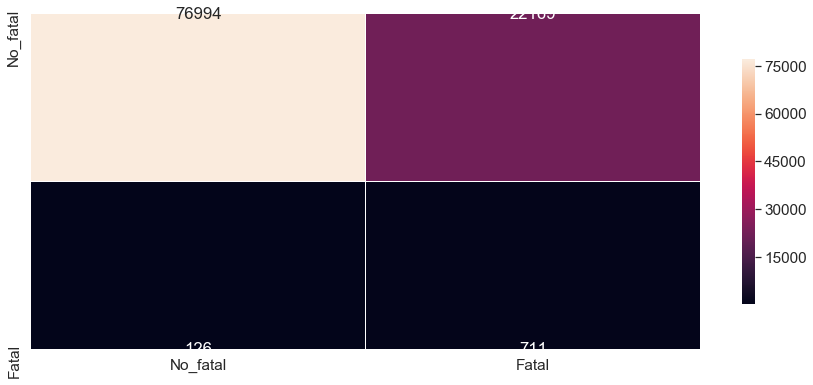

In [26]:
print('\nMatriz de confusión SVC : \n')
cm = confusion_matrix(y_test[:100000], ytest_pred_SVC)
target_names = ['No_fatal', 'Fatal']

print(cm)
print()


plt.figure(figsize=(15, 9))
b, t = plt.ylim()
b += 20
t -= 20
plt.ylim(b, t)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, square = True,
            linewidths=0.2,
            xticklabels = target_names,
            yticklabels = target_names,
            robust = False,
            cbar_kws = {'shrink': 0.5},
            fmt="d")

### 5.3.2 - Matriz de confusión MLP ###


Matriz de confusión MLP : 

[[79234 19929]
 [  123   714]]



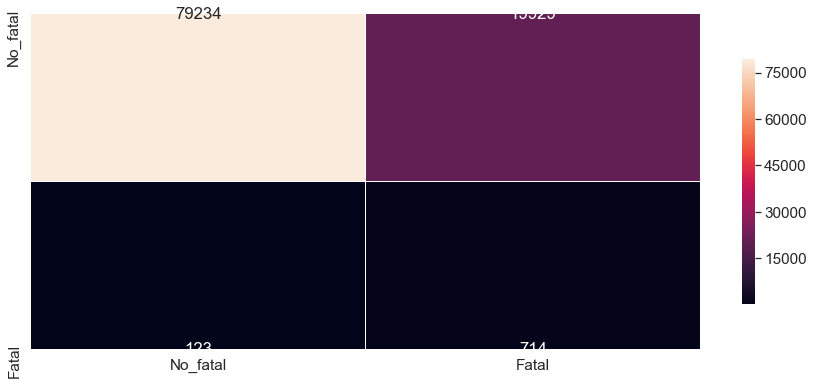

In [27]:
print('\nMatriz de confusión MLP : \n')
cm = confusion_matrix(y_test[:100000], ytest_pred_MLP)
target_names = ['No_fatal', 'Fatal']

print(cm)
print()


plt.figure(figsize=(15, 9))
b, t = plt.ylim()
b += 20
t -= 20
plt.ylim(b, t)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, square = True,
            linewidths=0.2,
            xticklabels = target_names,
            yticklabels = target_names,
            robust = False,
            cbar_kws = {'shrink': 0.5},
            fmt="d")

### 5.3.2 - Matriz de confusión Logistic Regression ###


Matriz de confusión Logistic Regression : 

[[645381 176895]
 [  1581   5184]]



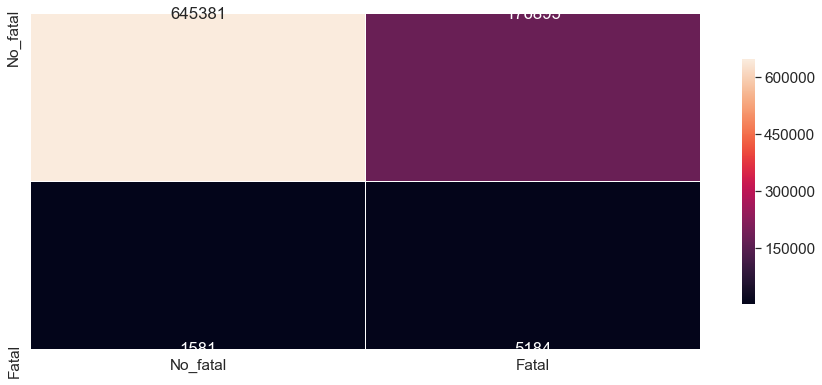

In [28]:
print('\nMatriz de confusión Logistic Regression : \n')
cm = confusion_matrix(y_test, ytest_pred_LogReg)
target_names = ['No_fatal', 'Fatal']

print(cm)
print()


plt.figure(figsize=(15, 9))
b, t = plt.ylim()
b += 20
t -= 20
plt.ylim(b, t)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot = True, square = True,
            linewidths=0.2,
            xticklabels = target_names,
            yticklabels = target_names,
            robust = False,
            cbar_kws = {'shrink': 0.5},
            fmt="d")

## 6 - Revisamos las variables  con más relevancia para el modelo de RF ##

Variables con más relevancia para el modelo en porcentaje, ordenadas de forma descendiente.

In [29]:
pd.concat([pd.DataFrame(df_train.drop(columns = names).columns, columns = ['features']),
           pd.DataFrame(np.transpose(model_RF.feature_importances_ * 100),
           columns = ['coef'])], axis = 1).sort_values(by='coef', ascending = False)

,features,coef
0,ID_ENTIDAD,8.871210
25,TIPACCID_Colision con vehiculo automotor1,8.867509
1,ID_MUNICIPIO,7.988062
2,ID_HORA,7.486844
13,ID_EDAD,7.394344
3,ID_DIA,7.008226
28,URBANA_Accidente en interseccion,6.181320
4,AUTOMOVIL,4.313406
24,TIPACCID_Colision con vehiculo automotor0,2.868546
31,SUBURBANA_Accidente en carretera estatal,2.409976


## 7 - Realizamos una predicción ##

   Una vez construido nuestro modelo, podemos realizar una predicción utilizando nuestros datos de prueba. Indicar el valor del registro que se quiere obtener su predicción en la variables 'index' declarada en la celda de abajo. Asignar  un valor de 0 a 829040.

In [1]:
index = 7988
ylabel = ''
prediccion = model_RF.predict_proba(X_test[index,:].reshape(1, -1))
print('\nNo fatal: {0: .2f}%'.format(prediccion[0][0] * 100))
print('Fatal: {0: .2f}%'.format(prediccion[0][1] * 100))

if y_test[index] == 0:
    ylabel = 'No fatal'
else:
    ylabel = 'Fatal'
    
print('Clasificación real: ' + ylabel)

NameError: name 'model_RF' is not defined